In [3]:
import leabra7.net
import matplotlib
import torch
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10, 6)

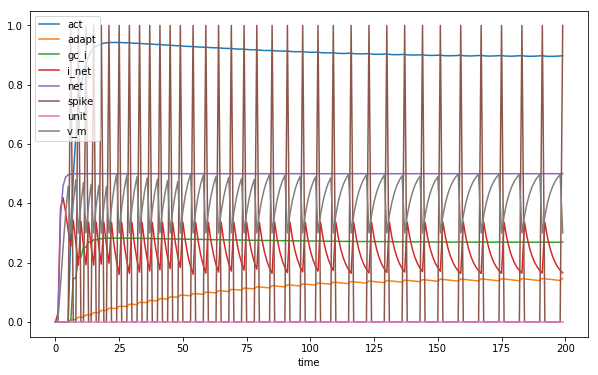

In [18]:
# Create the network
net = leabra7.net.Net()

# Set options for our layers
spec = leabra7.specs.LayerSpec(
    # For each layer, log the unit potential
    log_on_cycle=("unit_v_m", "unit_act", "unit_i_net",
                  "unit_net", "unit_gc_i", "unit_adapt",
                  "unit_spike")
)

# Create our layers and projections
net.new_layer("input", 1, spec)
net.new_layer("output", 1, spec)
net.new_projn("proj1", "input", "output")

# Run 200 cycles
for i in range(200):
    # Force the input unit activation to be 1
    # In the future, we'll have an easy way to do this
    net.force_layer(name = "input", acts = torch.ones([1,]))
    net.cycle()

wholeLog, partLog = net.logs(freq="cycle", name="output")
partLog.plot(x = 'time')